# 数据挖掘互评作业四：离群点分析与异常检测
数据集选择:skin和abalone两个数据集。

In [2]:
import os
import sys
import math
import pandas as pd
import numpy as np
import csv
import json
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [43]:
from pyod.utils.data import evaluate_print
from pyod.utils.utility import precision_n_scores
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.cblof import CBLOF

from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import column_or_1d
from sklearn.utils import check_consistent_length

## skin数据集
读取benchmarks文件夹下的所有文件

In [4]:
file_path = "E:/skin/benchmarks/"
skin_file = os.listdir(file_path)

### KNN
基于k-近邻平均距离（kNN）的离群点检测算法是一种比较简单的检测方法

In [33]:
knn_roc = []
knn_prn = []
for i in range(len(skin_file)):
    data = pd.read_csv(file_path + '/' + skin_file[i])
    data.loc[data['ground.truth'] == 'anomaly','ground.truth'] = 1
    data.loc[data['ground.truth'] == 'nominal','ground.truth'] = 0
    
    X = data[["R","G","B"]].values
    Y = data['ground.truth'].values.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
    clf_name = 'KNN'
    clf = KNN()
    clf.fit(X_train)
    
    y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
    y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
#     print("On train Data:")
#     evaluate_print(clf_name, y_train, y_train_scores)

    # 用训练好的clf来预测未知数据中的异常值
    y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
    y_test_scores = clf.decision_function(X_test)  # 返回未知数据上的异常值 (分值越大越异常)
#     print("On Test Data:")
#     evaluate_print(clf_name, y_test, y_test_scores)
    
    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)
    
    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    knn_roc.append(roc)
    knn_prn.append(prn)
    # break

E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin

In [34]:
print('KNN average ROC:', np.average(knn_roc))
print('KNN average PRN:', np.average(knn_prn))

KNN average ROC: 0.7724177333333334
KNN average PRN: 0.0793794


将文件夹下所有的csv文件数据进行训练以及测试，结果取其平均值，对于KNN算法其

ROC 为 0.7724

precision @ rank n 为0.079

## PCA
主成分分析法PCA，用PCA进行异常检测的原理是：PCA在做特征值分解之后得到的特征向量反应了原始数据方差变化程度的不同方向，特征值为数据在对应方向上的方差大小。所以，最大特征值对应的特征向量为数据方差最大的方向，最小特征值对应的特征向量为数据方差最小的方向。原始数据在不同方向上的方差变化反应了其内在特点。如果单个数据样本跟整体数据样本表现出的特点不太一致，比如在某些方向上跟其它数据样本偏离较大，可能就表示该数据样本是一个异常点。

In [38]:
pca_roc = []
pca_prn = []
for i in range(len(skin_file)):
    data = pd.read_csv(file_path + '/' + skin_file[i])
    data.loc[data['ground.truth'] == 'anomaly','ground.truth'] = 1
    data.loc[data['ground.truth'] == 'nominal','ground.truth'] = 0
    
    X = data[["R","G","B"]].values
    Y = data['ground.truth'].values.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
    clf_name = 'PCA'
    clf = PCA(n_selected_components=None, whiten=False)
    clf.fit(X_train)
    
    y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
    y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
#     print("On train Data:")
#     evaluate_print(clf_name, y_train, y_train_scores)

    # 用训练好的clf来预测未知数据中的异常值
    y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
    y_test_scores = clf.decision_function(X_test)  # 返回未知数据上的异常值 (分值越大越异常)
#     print("On Test Data:")
#     evaluate_print(clf_name, y_test, y_test_scores)
    
    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)
    
    try:
        roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
        prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
        pca_roc.append(roc)
        pca_prn.append(prn)
    except ValueError:
        pass
    # break

E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin

E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin

In [39]:
print('PCA average ROC:', np.average(pca_roc))
print('PCA average PRN:', np.average(pca_prn))

PCA average ROC: 0.4900636666666667
PCA average PRN: 0.060025800000000004


将文件夹下所有的csv文件数据进行训练以及测试，结果取其平均值，对于PCA算法其

ROC 为 0.49

precision @ rank n 为0.06

## CBLOF

CBLOF方法是聚类算法和LOF方法思想的结合, 利用聚类算法将数据集聚成簇, 然后根据簇大小划分大簇和小簇, 分别计算每个簇中数据的异常因子.该算法认为, 大簇中的数据点异常因子会比较低, 而小簇中数据点的异常因子相对较高.在同一个簇中, 簇边缘的数据点更可能是异常点, 而簇中心的点则更可能是正常点.本文中使用基于CBLOF算法检测异常的费用支出, 对每条数据计算异常因子值, 根据异常因子值的大小, 最终选取其中的一小部分数据作为候选异常记录集.

In [47]:
cblof_roc = []
cblof_prn = []
for i in range(len(skin_file)):
    data = pd.read_csv(file_path + '/' + skin_file[i])
    data.loc[data['ground.truth'] == 'anomaly','ground.truth'] = 1
    data.loc[data['ground.truth'] == 'nominal','ground.truth'] = 0
    
    X = data[["R","G","B"]].values
    Y = data['ground.truth'].values.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
    clf_name = 'CBLOF'
    clf = CBLOF(random_state=42)
    clf.fit(X_train)
    
    y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
    y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
#     print("On train Data:")
#     evaluate_print(clf_name, y_train, y_train_scores)

    # 用训练好的clf来预测未知数据中的异常值
    y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
    y_test_scores = clf.decision_function(X_test)  # 返回未知数据上的异常值 (分值越大越异常)
#     print("On Test Data:")
#     evaluate_print(clf_name, y_test, y_test_scores)
    
    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)
    
    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    cblof_roc.append(roc)
    cblof_prn.append(prn)
#     break

E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin

E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anzhuang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print('CBLOF average ROC:', np.average(cblof_roc))
print('CBLOF average PRN:', np.average(cblof_prn))

CBLOF average ROC: 0.7383418666666667
CBLOF average PRN: 0.09358173333333333


将文件夹下所有的csv文件数据进行训练以及测试，结果取其平均值，对于KNN算法其

ROC 为 0.7393

precision @ rank n 为0.09

## 模型对比
### ROC

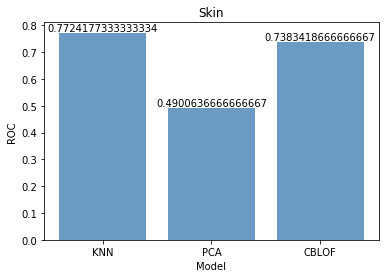

In [53]:
x = ['KNN', 'PCA', 'CBLOF']
y = [np.average(knn_roc),np.average(pca_roc),np.average(cblof_roc)]
plt.bar(x=x, height=y, label='ROC', color='steelblue', alpha=0.8)
for xx, yy in zip(x, y):
    plt.text(xx, yy, str(yy), ha='center', va='bottom', fontsize=10, rotation=0)
plt.title("Skin")
plt.xlabel("Model")
plt.ylabel("ROC")
plt.show()

如图所示，KNN算法的ROC结果最好
## precision @ rank n 

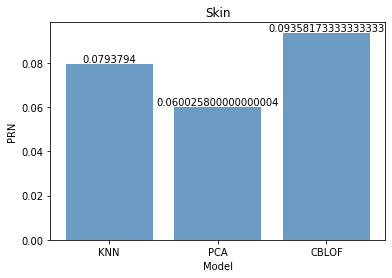

In [54]:
x = ['KNN', 'PCA', 'CBLOF']
y = [np.average(knn_prn),np.average(pca_prn),np.average(cblof_prn)]
plt.bar(x=x, height=y, label='ROC', color='steelblue', alpha=0.8)
for xx, yy in zip(x, y):
    plt.text(xx, yy, str(yy), ha='center', va='bottom', fontsize=10, rotation=0)
plt.title("Skin")
plt.xlabel("Model")
plt.ylabel("PRN")
plt.show()

如图所示，CBLOF算法的结果最好,而KNN的结果位于第二

# abalone数据集
同样利用KNN，PCA以及CBLOF算法来检测abalone的离群点

In [55]:
abalone_file_path = "E:/abalone/benchmarks"
abalone_file = os.listdir(abalone_file_path)

## KNN

In [59]:
a_knn_roc = []
a_knn_prn = []
for i in range(len(abalone_file)):
    data = pd.read_csv(abalone_file_path + '/' + abalone_file[i])
    data.loc[data['ground.truth'] == 'anomaly','ground.truth'] = 1
    data.loc[data['ground.truth'] == 'nominal','ground.truth'] = 0
    
    X = data[["V1","V2","V3", "V4", "V5", "V6", "V7"]].values
    Y = data['ground.truth'].values.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
    clf_name = 'KNN'
    clf = KNN()
    clf.fit(X_train)
    
    y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
    y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
#     print("On train Data:")
#     evaluate_print(clf_name, y_train, y_train_scores)

    # 用训练好的clf来预测未知数据中的异常值
    y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
    y_test_scores = clf.decision_function(X_test)  # 返回未知数据上的异常值 (分值越大越异常)
#     print("On Test Data:")
#     evaluate_print(clf_name, y_test, y_test_scores)
    
    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)
    
    try:
        roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
        prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
        a_knn_roc.append(roc)
        a_knn_prn.append(prn)
    except ValueError:
        pass
  
    # break

In [60]:
print('KNN average ROC:', np.average(a_knn_roc))
print('KNN average PRN:', np.average(a_knn_prn))

KNN average ROC: 0.7294404678362574
KNN average PRN: 0.33166707602339174


对于abalone数据集，KNN算法结果如上所示
## PCA

In [61]:
a_pca_roc = []
a_pca_prn = []
for i in range(len(abalone_file)):
    data = pd.read_csv(abalone_file_path + '/' + abalone_file[i])
    data.loc[data['ground.truth'] == 'anomaly','ground.truth'] = 1
    data.loc[data['ground.truth'] == 'nominal','ground.truth'] = 0
    
    X = data[["V1","V2","V3", "V4", "V5", "V6", "V7"]].values
    Y = data['ground.truth'].values.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
    clf_name = 'PCA'
    clf = PCA(n_selected_components=None, whiten=False)
    clf.fit(X_train)
    
    y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
    y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
#     print("On train Data:")
#     evaluate_print(clf_name, y_train, y_train_scores)

    # 用训练好的clf来预测未知数据中的异常值
    y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
    y_test_scores = clf.decision_function(X_test)  # 返回未知数据上的异常值 (分值越大越异常)
#     print("On Test Data:")
#     evaluate_print(clf_name, y_test, y_test_scores)
    
    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)
    
    try:
        roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
        prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
        a_pca_roc.append(roc)
        a_pca_prn.append(prn)
    except ValueError:
        pass
    
    # break

In [62]:
print('PCA average ROC:', np.average(a_pca_roc))
print('PCA average PRN:', np.average(a_pca_prn))

PCA average ROC: 0.6616119298245615
PCA average PRN: 0.2809377192982456


PCA算法在数据集上的结果如上所示
## CBLOF

In [64]:
a_cblof_roc = []
a_cblof_prn = []
for i in range(len(abalone_file)):
    try:
        data = pd.read_csv(abalone_file_path + '/' + abalone_file[i])
        data.loc[data['ground.truth'] == 'anomaly','ground.truth'] = 1
        data.loc[data['ground.truth'] == 'nominal','ground.truth'] = 0

        X = data[["V1","V2","V3", "V4", "V5", "V6", "V7"]].values
        Y = data['ground.truth'].values.tolist()

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

        clf_name = 'CBLOF'
        clf = CBLOF()
        clf.fit(X_train)

        y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
        y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)
    #     print("On train Data:")
    #     evaluate_print(clf_name, y_train, y_train_scores)

        # 用训练好的clf来预测未知数据中的异常值
        y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
        y_test_scores = clf.decision_function(X_test)  # 返回未知数据上的异常值 (分值越大越异常)
    #     print("On Test Data:")
    #     evaluate_print(clf_name, y_test, y_test_scores)

        y_true = column_or_1d(y_test)
        y_pred = column_or_1d(y_test_scores)
        check_consistent_length(y_true, y_pred)
   
        roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
        prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
        a_cblof_roc.append(roc)
        a_cblof_prn.append(prn)
    except ValueError:
        pass
   
    # break

In [65]:
print('CBLOF average ROC:', np.average(a_cblof_roc))
print('CBLOF average PRN:', np.average(a_cblof_prn))

CBLOF average ROC: 0.6828985956699823
CBLOF average PRN: 0.288885839672323


CBLOF算法在abalone数据集上的结果如上所示
## 对比
### ROC 

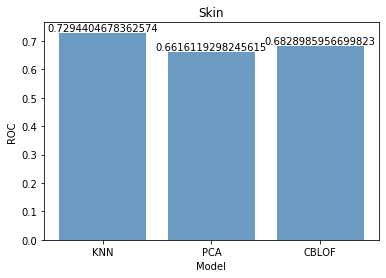

In [66]:
x = ['KNN', 'PCA', 'CBLOF']
y = [np.average(a_knn_roc),np.average(a_pca_roc),np.average(a_cblof_roc)]
plt.bar(x=x, height=y, label='ROC', color='steelblue', alpha=0.8)
for xx, yy in zip(x, y):
    plt.text(xx, yy, str(yy), ha='center', va='bottom', fontsize=10, rotation=0)
plt.title("Skin")
plt.xlabel("Model")
plt.ylabel("ROC")
plt.show()

如图所示，我们发现三个模型的ROC比较接近，但是KNN算法的结果依旧是最高的
### precision @ rank n

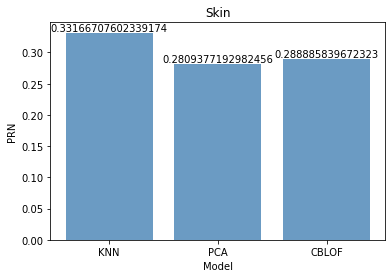

In [67]:
x = ['KNN', 'PCA', 'CBLOF']
y = [np.average(a_knn_prn),np.average(a_pca_prn),np.average(a_cblof_prn)]
plt.bar(x=x, height=y, label='ROC', color='steelblue', alpha=0.8)
for xx, yy in zip(x, y):
    plt.text(xx, yy, str(yy), ha='center', va='bottom', fontsize=10, rotation=0)
plt.title("Skin")
plt.xlabel("Model")
plt.ylabel("PRN")
plt.show()

如图所示，KNN算法的结果最好，而skin数据集是CBLOF的结果最好